In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Students.csv")

In [3]:
df.head()  #### 0 means not approved , 1 means approved after giving JEE Exams

,JEEPRE,JEEMAINS,STATUS
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df['JEEPRE'].describe()

count    100.000000
mean      65.644274
std       19.458222
min       30.058822
25%       50.919511
50%       67.032988
75%       80.212529
max       99.827858
Name: JEEPRE, dtype: float64

In [5]:
df.STATUS.value_counts()

1    60
0    40
Name: STATUS, dtype: int64

In [6]:
df.shape

(100, 3)

In [8]:
corr = df.corr()

In [9]:
corr

,JEEPRE,JEEMAINS,STATUS
JEEPRE,1.000000,-0.023665,0.574057
JEEMAINS,-0.023665,1.000000,0.512323
STATUS,0.574057,0.512323,1.000000


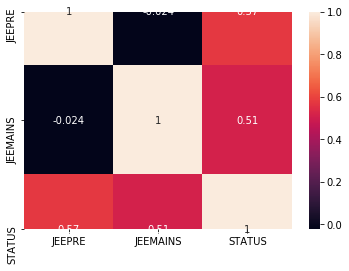

In [12]:
import seaborn as sns
%pylab inline
sns.heatmap(corr,annot = True)

In [13]:
import matplotlib.pyplot as plt

C:\Users\proyas.bose\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\proyas.bose\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


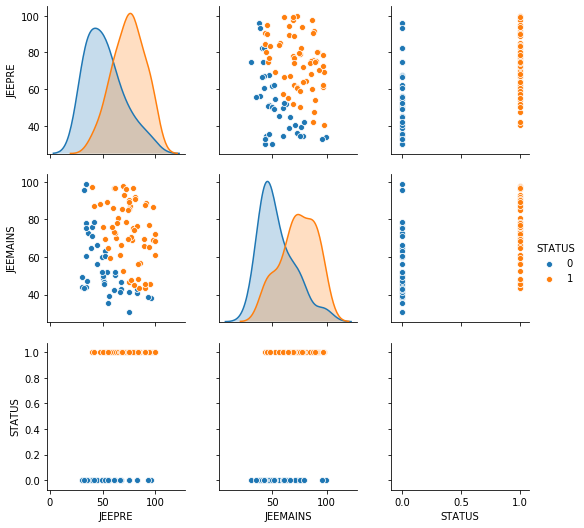

In [15]:
sns.pairplot(df,hue = 'STATUS')

In [20]:
X = df[['JEEPRE','JEEMAINS']]
X.head(),X.shape

(      JEEPRE   JEEMAINS
 0  34.623660  78.024693
 1  30.286711  43.894998
 2  35.847409  72.902198
 3  60.182599  86.308552
 4  79.032736  75.344376, (100, 2))

In [19]:
y = df.STATUS
y.head(),y.shape

(0    0
 1    0
 2    0
 3    1
 4    1
 Name: STATUS, dtype: int64, (100,))

In [21]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [61]:
X_train.shape,X_test.shape

((80, 2), (20, 2))

In [62]:
y_train.shape,y_test.shape

((80,), (20,))

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
model_fit = model.fit(X_train,y_train)  #### Based on the 70% of the data
model_fit

C:\Users\proyas.bose\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
model_fit.coef_

array([[0.03899239, 0.02316906]])

In [67]:
pred = model_fit.predict(X_test)  ### Only 30 values

In [68]:
pred,pred.shape

(array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0],
       dtype=int64), (20,))

In [69]:
comaparison = pd.DataFrame({'Actual':y_test,'Predicted':pred})
comaparison

,Actual,Predicted
18,1,1
37,1,1
49,1,1
91,1,1
45,0,1
34,0,0
40,1,1
58,1,1
38,0,1
88,1,1


In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
results = confusion_matrix(y_test,pred)
results

array([[ 4,  4],
       [ 0, 12]], dtype=int64)

In [72]:
Accuracy  = (12+4)/20    ## The more it will be the more strength of the model is

In [73]:
Accuracy*100

80.0

In [74]:
(1 - Accuracy)*100   ### The Less it will be the better it is 

19.999999999999996

In [79]:
X_test.shape

(20, 2)

In [81]:
X_test['Actual'] = y_test
X_test

C:\Users\proyas.bose\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,JEEPRE,JEEMAINS,Actual
18,70.661510,92.927138,1
37,64.176989,80.908061,1
49,91.564975,88.696293,1
91,90.448551,87.508792,1
45,62.222676,52.060992,0
34,40.236894,71.167748,0
40,83.902394,56.308046,1
58,74.248691,69.824571,1
38,74.789253,41.573415,0
88,78.635424,96.647427,1


In [83]:
X_test['Predicted'] = pred
X_test

C:\Users\proyas.bose\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,JEEPRE,JEEMAINS,Actual,Predicted
18,70.661510,92.927138,1,1
37,64.176989,80.908061,1,1
49,91.564975,88.696293,1,1
91,90.448551,87.508792,1,1
45,62.222676,52.060992,0,1
34,40.236894,71.167748,0,0
40,83.902394,56.308046,1,1
58,74.248691,69.824571,1,1
38,74.789253,41.573415,0,1
88,78.635424,96.647427,1,1


In [85]:
X_test[X_test['Actual'] == 0]

,JEEPRE,JEEMAINS,Actual,Predicted
45,62.222676,52.060992,0,1
34,40.236894,71.167748,0,0
38,74.789253,41.573415,0,1
11,75.013658,30.603263,0,1
53,34.524514,60.396342,0,0
39,34.183640,75.237720,0,0
27,93.114389,38.800670,0,1
78,60.455556,42.508409,0,0


In [86]:
X_test.to_csv("C:\\Users\\proyas.bose\\Desktop\\output.csv")